In [81]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def flächenkatify(area):
    bsize = 5 if area < 120 else 10
    return bsize * round(area/bsize)

kauf = pd.read_csv('../dta/kauf.csv')
kauf = kauf[kauf['typ'] == 'Wohnung']
kauf = kauf[(kauf.fläche < 200) & (kauf.fläche > 10)]
kauf['preis_qm'] = kauf.preis / kauf.fläche
kauf['flächenkat'] = kauf.fläche.apply(flächenkatify)

miete = pd.read_csv('../dta/miete.csv')
miete = miete[miete['typ'] == 'Wohnung']
miete = miete[(miete.fläche < 200) & (miete.fläche > 10)]
miete['miete_qm'] = miete.miete / miete.fläche
miete['flächenkat'] = miete.fläche.apply(flächenkatify)
miete.columns

Index(['typ', 'kreis', 'miete', 'fläche', 'zimmer', 'miete_qm', 'flächenkat'], dtype='object')

In [82]:
many_cities = "Leipzig Berlin Chemnitz Dresden Düsseldorf Hamburg Köln".split()
few_cities = "Leipzig Berlin Chemnitz Hamburg".split()
miete.kreis.value_counts()

Leipzig                                     5368
Berlin                                      4836
Chemnitz                                    3247
Dresden                                     2391
Essen                                       1950
Duisburg                                    1931
Düsseldorf                                  1620
Hamburg                                     1606
Recklinghausen (Kreis)                      1514
Gelsenkirchen                               1347
Frankfurt am Main                           1294
Halle (Saale)                               1205
Dortmund                                    1192
Köln                                        1152
Wuppertal                                   1110
München                                     1088
Magdeburg                                   1044
Mittelsachsen (Kreis)                        892
Mettmann (Kreis)                             860
Meißen (Kreis)                               736
Sächsische Schweiz-O

In [102]:
def miet_kauf_plot(miete, kauf, ort):
    plt.figure(figsize=(12, 6))
    miete.fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Miete")
    kauf.fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Kauf")
    plt.ylabel("Anzahl Angebote Tag X")
    plt.xlabel("Wohnfläche")
    plt.title('Häufigkeit Angebote in ' + ort)
    plt.legend()
    
def miet_kauf_plot_ort(miete, kauf, ort):
    miet_kauf_plot(miete[miete.kreis==ort], kauf[kauf.kreis==ort], ort)

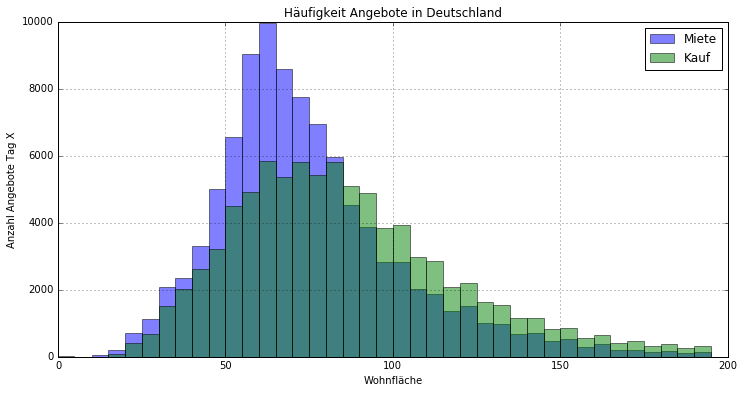

In [100]:
miet_kauf_plot(miete, kauf, 'Deutschland')

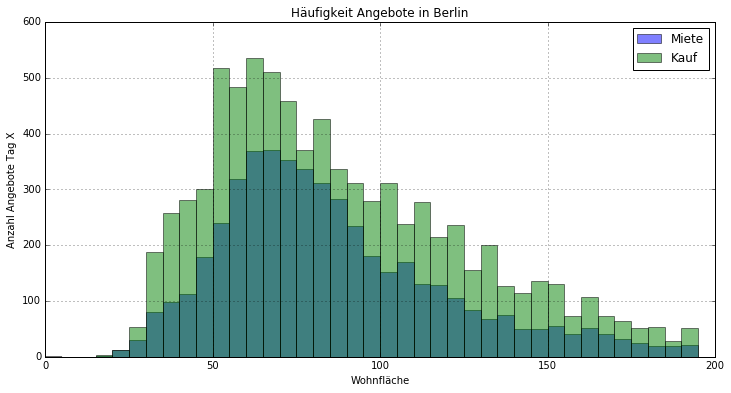

In [103]:
miet_kauf_plot_ort(miete, kauf, 'Berlin')

In [87]:
def kauf_miete_preisplot(kauf, miete, ort):
    f, ax_kauf = plt.subplots(1, figsize=(12, 6))
    ax_kauf.set_ylim(ymin=0, ymax=8000)
    ax_kauf.set_xlim(xmin=0)
    ax_kauf.set_xticks(np.arange(0, 200, 10))                                           
    # ax_kauf.set_yticks(np.arange(0, 30, 1), minor=True)                                           
    # ax_kauf.axis([0, 0, 200, 8000])
    kauf.groupby(kauf.flächenkat).preis_qm.mean().plot(label='Whg Kauf', style='r')
    ax_kauf.grid(alpha=0.5)                                                
    ax_kauf.legend()
    plt.xlabel("Wohnfläche")
    plt.ylabel("Preis pro qm")

    ax_miete = ax_kauf.twinx()
    ax_miete.set_ylim(ymin=0, ymax=20)
    ax_miete.set_xlim(xmin=0)
    ax_miete.set_yticks(np.arange(0, 20, 1), minor=True)                                           
    ax_miete.set_xticks(np.arange(0, 200, 10))                                           
    # ax_miete.axis([0, 0, 200, 20])
    miete.groupby(miete.flächenkat).miete_qm.mean().plot(label='Whg Miete')
    plt.ylabel("Miete pro qm")
    ax_miete.legend()
    plt.title('Kauf- und Mietpreis in ' + ort)
    plt.show(f)
    
def kauf_miete_preisplot_ort(kauf, miete, ort):
    kauf_miete_preisplot(kauf[kauf.kreis==ort], miete[miete.kreis==ort], ort)

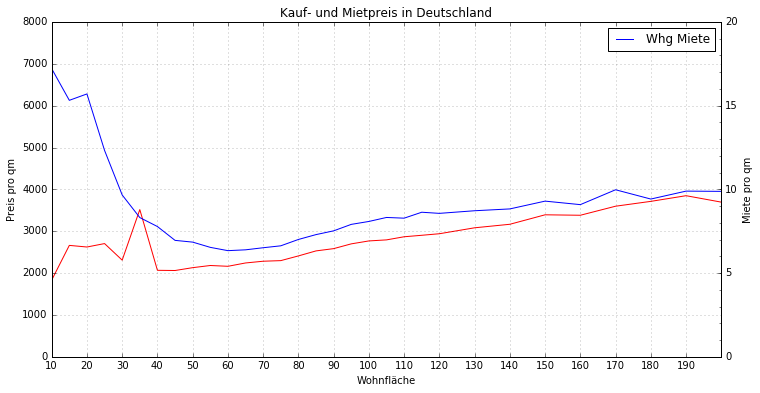

In [88]:
kauf_miete_preisplot(kauf, miete, 'Deutschland')

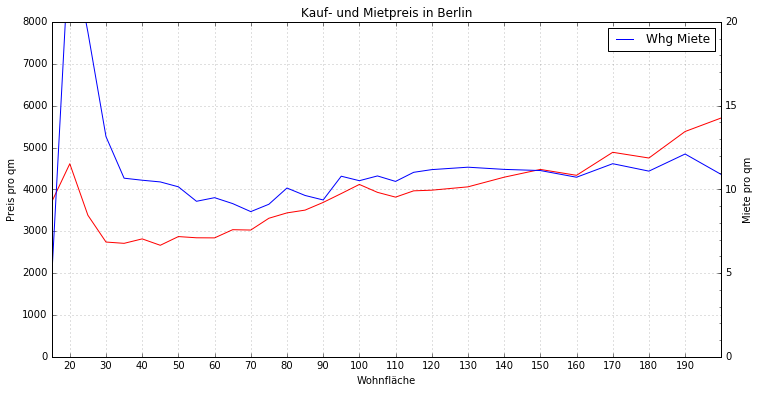

In [89]:
kauf_miete_preisplot_ort(kauf, miete, 'Berlin')

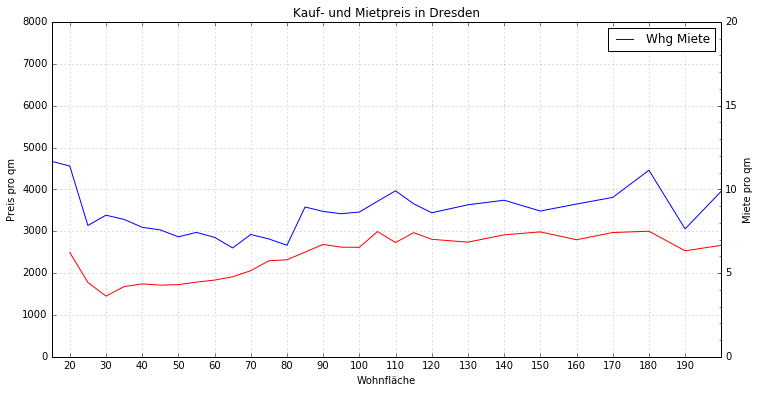

In [90]:
kauf_miete_preisplot_ort(kauf, miete, 'Dresden')

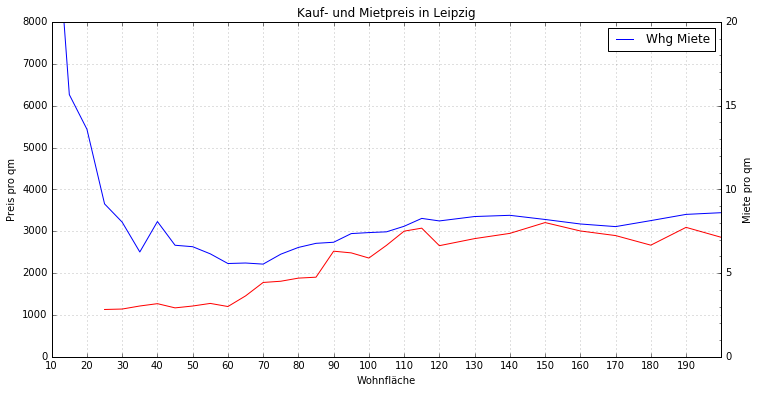

In [91]:
kauf_miete_preisplot_ort(kauf, miete, 'Leipzig')

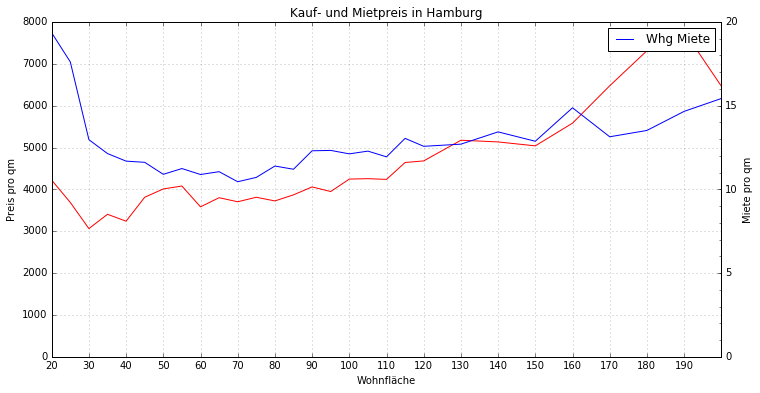

In [92]:
kauf_miete_preisplot_ort(kauf, miete, 'Hamburg')

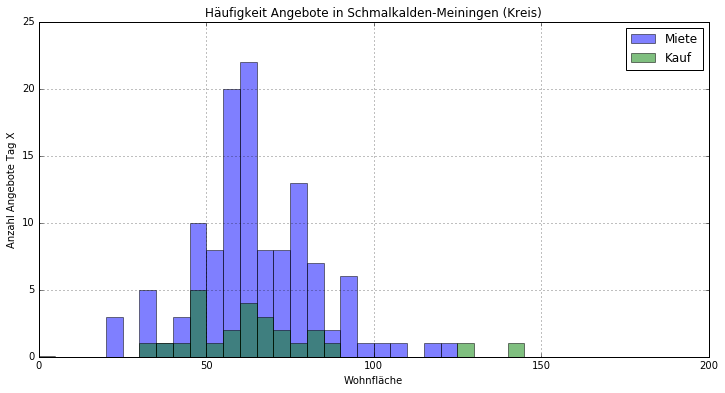

In [105]:
miet_kauf_plot_ort(miete, kauf, 'Schmalkalden-Meiningen (Kreis)')

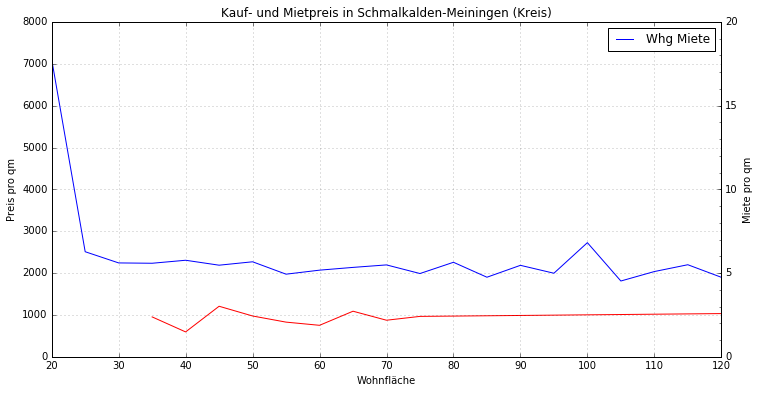

In [106]:
kauf_miete_preisplot_ort(kauf, miete, 'Schmalkalden-Meiningen (Kreis)')

This is to explain the weird behaviour for flats in Deutschland gesamt at around 35 sq.m. As you can see from the Graph below, the outlying average value isn't due to some few freak values, but rather due to a lack of normally priced values, which are by about 20% lower and especially cheap ones which are more than 25% lower.

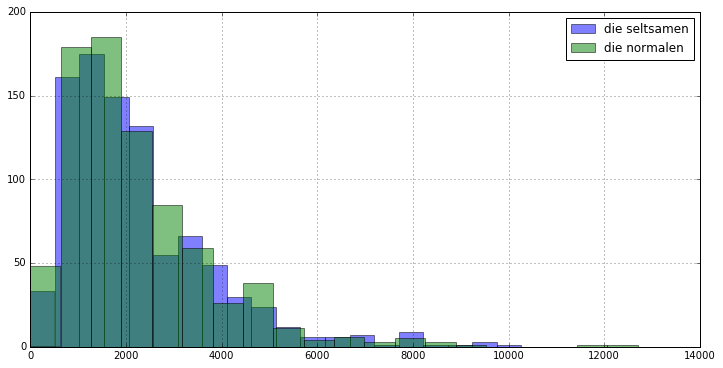

In [44]:
plt.figure(figsize=(12, 6))
# bins=np.arange(0, 15000, 250)
kauf[(kauf.fläche > 33) & (kauf.fläche < 36)].preis_qm.hist(bins=20, label='die seltsamen', alpha = 0.5)
kauf[(kauf.fläche > 30) & (kauf.fläche <= 33)].preis_qm.hist(bins=20, label='die normalen', alpha = 0.5)
plt.legend()